
# Project2: Investigating and analysing a Dataset Of movies . 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I have loaded a dataset that contain 4,800 movis and 20 columns.I Will describe my project in four steps.

step1: Ask question, i will discover the relationship between variables for example, relationship between revenue and budget.

step2:Data Wrangling. Gather, load, and assess the data.check if there missing values ,drop duplicates

step3:Create better features, and ﬁnd patterns. 

step4:Conclusions,make my observation about relationships 


Q1:revenue and budget of movies increase or decrease over years?
Q2:what is the Average runtime of all the movies?


In [24]:
# import مibraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

<a id='wrangling'></a>
## Data Wrangling

 In this step i will gather data of  as csv file from kaggle, then load into dataframe. i will be locking structure of dataframe such as, missing missing values or duplicates. remove any data that does not help to make ensure dataset is clean for analysis. 

### General Properties

In [25]:
#Load data set into dataframe and show indformation of dataset
df = pd.read_csv('tmdb_5000_movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [26]:
#number rows and columns
df.shape

(4803, 20)

In [27]:
#statistical data
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000



### Data Cleaning

Here i will make modification on data, for example drop extra columns and data .
Remove duplicate data and missing values .

In [28]:

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [29]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [30]:
#drop extra columns and  non value  
df.drop(['id','overview','tagline','overview','keywords','homepage'], axis=1, inplace=True ) 
df.dropna(inplace=True)



In [31]:
# check here for missing  values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 15 columns):
budget                  4800 non-null int64
genres                  4800 non-null object
original_language       4800 non-null object
original_title          4800 non-null object
popularity              4800 non-null float64
production_companies    4800 non-null object
production_countries    4800 non-null object
release_date            4800 non-null object
revenue                 4800 non-null int64
runtime                 4800 non-null float64
spoken_languages        4800 non-null object
status                  4800 non-null object
title                   4800 non-null object
vote_average            4800 non-null float64
vote_count              4800 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 600.0+ KB


In [32]:
# show data of budget that equal 0
df[(df.budget==0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 265 to 4802
Data columns (total 15 columns):
budget                  1036 non-null int64
genres                  1036 non-null object
original_language       1036 non-null object
original_title          1036 non-null object
popularity              1036 non-null float64
production_companies    1036 non-null object
production_countries    1036 non-null object
release_date            1036 non-null object
revenue                 1036 non-null int64
runtime                 1036 non-null float64
spoken_languages        1036 non-null object
status                  1036 non-null object
title                   1036 non-null object
vote_average            1036 non-null float64
vote_count              1036 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 129.5+ KB


In [33]:
#delete data that equal 0
df=df[df.budget !=0]


In [34]:
# show data of revenue that equal 0

df[(df.revenue==0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 83 to 4799
Data columns (total 15 columns):
budget                  535 non-null int64
genres                  535 non-null object
original_language       535 non-null object
original_title          535 non-null object
popularity              535 non-null float64
production_companies    535 non-null object
production_countries    535 non-null object
release_date            535 non-null object
revenue                 535 non-null int64
runtime                 535 non-null float64
spoken_languages        535 non-null object
status                  535 non-null object
title                   535 non-null object
vote_average            535 non-null float64
vote_count              535 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 66.9+ KB


In [35]:
#delete data that equal 0

df=df[df.revenue !=0]

In [36]:
# find duplicate in data
sum(df.duplicated())

0

In [37]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3.229000e+03,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000
mean,4.065444e+07,29.033689,1.212430e+08,110.724373,6.309353,977.287395
std,4.439674e+07,36.165730,1.863029e+08,20.965694,0.873891,1414.309577
min,1.000000e+00,0.019984,5.000000e+00,41.000000,0.000000,0.000000
25%,1.050000e+07,10.446722,1.700000e+07,96.000000,5.800000,178.000000
50%,2.500000e+07,20.410354,5.518472e+07,107.000000,6.300000,471.000000
75%,5.500000e+07,37.335721,1.462920e+08,121.000000,6.900000,1148.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


In [38]:
#show selected columns
df[['original_title','budget','popularity','genres','revenue']].head(10)

,original_title,budget,popularity,genres,revenue
0,Avatar,237000000,150.437577,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2787965087
1,Pirates of the Caribbean: At World's End,300000000,139.082615,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",961000000
2,Spectre,245000000,107.376788,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",880674609
3,The Dark Knight Rises,250000000,112.312950,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",1084939099
4,John Carter,260000000,43.926995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",284139100
5,Spider-Man 3,258000000,115.699814,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",890871626
6,Tangled,260000000,48.681969,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",591794936
7,Avengers: Age of Ultron,280000000,134.279229,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1405403694
8,Harry Potter and the Half-Blood Prince,250000000,98.885637,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",933959197
9,Batman v Superman: Dawn of Justice,250000000,155.790452,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",873260194


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 15 columns):
budget                  3229 non-null int64
genres                  3229 non-null object
original_language       3229 non-null object
original_title          3229 non-null object
popularity              3229 non-null float64
production_companies    3229 non-null object
production_countries    3229 non-null object
release_date            3229 non-null object
revenue                 3229 non-null int64
runtime                 3229 non-null float64
spoken_languages        3229 non-null object
status                  3229 non-null object
title                   3229 non-null object
vote_average            3229 non-null float64
vote_count              3229 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 403.6+ KB


In [40]:
# create new columns for calculate profit of movies from revenue and budget

df['profit']=df['revenue']-df['budget']
df.head(10)

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,24139100
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",en,Spider-Man 3,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576,632871626
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",en,Tangled,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.4,3330,331794936
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avengers: Age of Ultron,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Avengers: Age of Ultron,7.3,6767,1125403694
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Harry Potter and the Half-Blood Prince,98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Harry Potter and the Half-Blood Prince,7.4,5293,683959197
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Batman v Superman: Dawn of Justice,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman v Superman: Dawn of Justice,5.7,7004,623260194


In [41]:
#no negative numbers for profit
df.loc[df['profit'] < 0, 'profit'] = 0

In [42]:
#creat new columns called revenue_rate to splice the revenue column into groups.
bin_edges = [0, 1e+06, 1e+09, 2.827124e+09]
bin_names = ['under_million', 'millions', 'billions']
df['revenue_rate'] = pd.cut(df['revenue'], bin_edges, labels=bin_names
)
df.head()


,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit,revenue_rate
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087,billions
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,661000000,millions
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,635674609,millions
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,834939099,billions
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,24139100,millions


In [43]:
#creat new column called release_year and converted to year format from release_date
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
df['release_year'].head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: release_year, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

In this section, i'll compute statistics and create visualizations with to address my questions. 
### Research Question 1 revenue and budget of movies increase or decrease over years?

                   revenue        budget
release_year                            
1916          8.394751e+06  3.859070e+05
1925          2.200000e+07  2.450000e+05
1927          6.504220e+05  9.262000e+07
1929          4.358000e+06  3.790000e+05
1930          8.000000e+06  3.950000e+06
...                    ...           ...
2012          1.735361e+08  5.189104e+07
2013          1.522739e+08  5.233151e+07
2014          1.781277e+08  5.198148e+07
2015          1.857632e+08  5.284711e+07
2016          2.007115e+08  6.379708e+07

[89 rows x 2 columns]


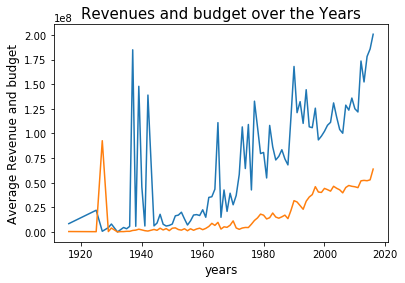

In [44]:
# making groupby by release_year
rev_budg = df.groupby('release_year')['revenue','budget'].mean()
print(df.groupby('release_year')['revenue','budget'].mean()) 
#giving a Line plot
#displays the plot

plt.plot(rev_budg )
#Name of the graph 
plt.title('Revenues and budget over the Years', size=15); 
#On x-axis 
plt.xlabel('years', size=12)
#On y-axis 

plt.ylabel('Average Revenue and budget', size=12);
#as we see in the chart the revenues and budget is increasing over the years 

### Research Question 2:what is the Average runtime of all the movies?

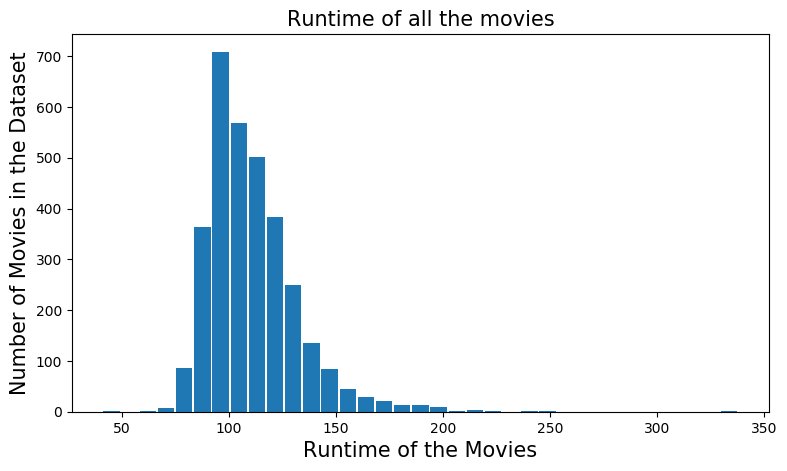

In [45]:
#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Number of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()


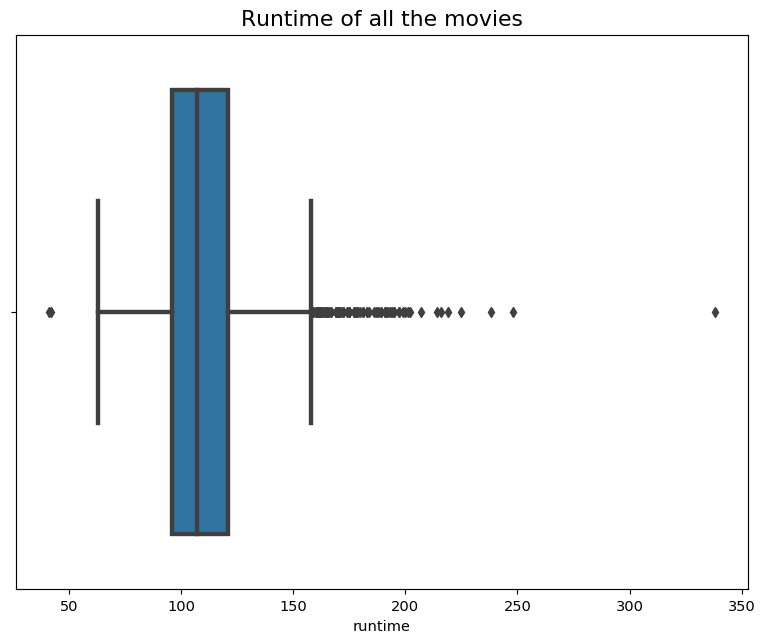

In [46]:
#Using different kind of plots
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

<a id='conclusions'></a>
## Conclusions


 The revenues and budget is increasing over the years.
 
  The average runtime of all movies is  between 80 to 115 minutes.


# Limitations

This data was gathering through The Movie Databae (TMDB) from kagel .
I had a problem with revenue and budget because there are 0 values and I have deleted them, I think if the values are there the results will be more accurate and efficient

The size of the dataset is sufficient to give a good judgement about the questions my asked.